# Assignment 2

Name: Mike Mico

StdId: 3685120

# Hypothesis

I will be looking at different ethnic groups to find out if there is a bias between the groups.
I will also find out which student ethnic group is most likely to reoffend based on the given data.

### Cleaning up Dataset

In [428]:
import pandas as pd

df = pd.read_excel('NM student infractions 2010-2022.xlsx')

In [429]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285917 entries, 0 to 285916
Data columns (total 39 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   District Name                    285917 non-null  object        
 1   District Code                    285917 non-null  int64         
 2   Location Organization Type Code  285912 non-null  object        
 3   School Year                      285917 non-null  datetime64[ns]
 4   Student Grade Level              285917 non-null  object        
 5   Infraction Event ID              285917 non-null  object        
 6   Discipline Infraction Date       285917 non-null  datetime64[ns]
 7   Discipline Infraction Code       285917 non-null  object        
 8   Discipline Infraction            285917 non-null  object        
 9   Drug Related                     285917 non-null  object        
 10  Alcohol Related                  285917 non-

In [575]:
df2 = df[['Student Race Ethnicity Derived','Student Grade Level','Repeat Offender','Discipline Response Duration','Hate Crime','Serious Injury']]

In [576]:
df2

,Student Race Ethnicity Derived,Student Grade Level,Repeat Offender,Discipline Response Duration,Hate Crime,Serious Injury
0,Hispanic,8,N,2.0,No,No
1,Caucasian,8,N,2.0,No,No
2,Asian,8,N,1.0,No,No
3,Caucasian,8,Y,1.0,No,No
4,Hispanic,8,Y,1.0,No,No
...,...,...,...,...,...,...
285912,American Indian/Alaskan Native,7,N,3.0,No,No
285913,American Indian/Alaskan Native,7,N,5.0,No,No
285914,American Indian/Alaskan Native,12,Y,5.0,No,No
285915,American Indian/Alaskan Native,9,N,3.0,No,No


### Delete empty columns

In [577]:
df2 = df2.dropna()
df2

,Student Race Ethnicity Derived,Student Grade Level,Repeat Offender,Discipline Response Duration,Hate Crime,Serious Injury
0,Hispanic,8,N,2.0,No,No
1,Caucasian,8,N,2.0,No,No
2,Asian,8,N,1.0,No,No
3,Caucasian,8,Y,1.0,No,No
4,Hispanic,8,Y,1.0,No,No
...,...,...,...,...,...,...
285912,American Indian/Alaskan Native,7,N,3.0,No,No
285913,American Indian/Alaskan Native,7,N,5.0,No,No
285914,American Indian/Alaskan Native,12,Y,5.0,No,No
285915,American Indian/Alaskan Native,9,N,3.0,No,No


## separate datasets by ethnicity
dflist[i]

In [578]:
ethnicity = df2['Student Race Ethnicity Derived'].unique()
len(ethnicity)
ethnicity

array(['Hispanic', 'Caucasian', 'Asian', 'Black or African American',
       'American Indian/Alaskan Native',
       'Native Hawaiian or Other Pacific Islander', 'Multiracial',
       'Native Hawaiiam or Other Pacific Islander'], dtype=object)

In [579]:
dfhisp = df2.loc[df['Student Race Ethnicity Derived']== ethnicity[0]]
dfcauc = df2.loc[df['Student Race Ethnicity Derived']== ethnicity[1]]
dfasian = df2.loc[df['Student Race Ethnicity Derived']== ethnicity[2]]
dfblack = df2.loc[df['Student Race Ethnicity Derived']== ethnicity[3]]
dfamer = df2.loc[df['Student Race Ethnicity Derived']== ethnicity[4]]
dfhawaii = df2.loc[df['Student Race Ethnicity Derived']== ethnicity[5]]
dfmult = df2.loc[df['Student Race Ethnicity Derived']== ethnicity[0]]
dfhawaiim =df2.loc[df['Student Race Ethnicity Derived']== ethnicity[7]]
dfhawaii = pd.concat([dfhawaii,dfhawaiim])

#dflist = ['dfhisp','dfcauc','dfasian','dfblack','dfamer','dfhawaii','dfmult']
dflist=[]
dflist.append(dfhisp)
dflist.append(dfcauc)
dflist.append(dfasian)
dflist.append(dfblack)
dflist.append(dfamer)
dflist.append(dfhawaii)
dflist.append(dfmult)


In [580]:
X = dfhisp.iloc[:, 0:1].values
y = dfhisp.iloc[:,4].values
print(X)
y

[['Hispanic']
 ['Hispanic']
 ['Hispanic']
 ...
 ['Hispanic']
 ['Hispanic']
 ['Hispanic']]


array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

# Change data into numerical versions

In [581]:
def racetonum(df2):
    for i in range(7):
        df2.loc[df2["Student Race Ethnicity Derived"] == ethnicity[i], "Student Race Ethnicity Derived"] = i
        # dealing with hawaiim
        df2.loc[df2["Student Race Ethnicity Derived"] == "Native Hawaiiam or Other Pacific Islander", "Student Race Ethnicity Derived"] = 5

In [582]:
def rptofftonum(df2):
    for i in range(7):
        df2.loc[df2["Repeat Offender"] == "N", "Repeat Offender"] = 0
        df2.loc[df2["Repeat Offender"] == "Y", "Repeat Offender"] = 1
        
for i in range(7):
    rptofftonum(dflist[i])

In [583]:
for i in range(7):
    racetonum(dflist[i])

In [584]:
def hateCrime(df2):
    for i in range(7):
        df2.loc[df2["Hate Crime"] == "No", "Hate Crime"] = 0
        df2.loc[df2["Hate Crime"] == "Yes", "Hate Crime"] = 1
        
for i in range(7):
    hateCrime(dflist[i])

In [585]:
def cleanGradeLevel(df2):
    for i in range(7):
        df2.loc[df2["Student Grade Level"]== "KF", "Student Grade Level"] = 0
        df2.loc[df2["Student Grade Level"]== "PK", "Student Grade Level"] = 0
        df2.loc[df2["Student Grade Level"]== "OS", "Student Grade Level"] = 0
for i in range(7):
    cleanGradeLevel(dflist[i])

In [586]:
def serinjtonum(df2):
    for i in range(7):
        df2.loc[df2["Serious Injury"] == "No", "Serious Injury"] = 0
        df2.loc[df2["Serious Injury"] == "Yes", "Serious Injury"] = 1
        
for i in range(7):
    serinjtonum(dflist[i])

In [587]:
def printdf(df):
    display(df)

for i in range(7):
    printdf(dflist[i])

,Student Race Ethnicity Derived,Student Grade Level,Repeat Offender,Discipline Response Duration,Hate Crime,Serious Injury
0,0,8,0,2.0,0,0
4,0,8,1,1.0,0,0
7,0,6,0,3.0,0,0
16,0,8,0,0.0,0,0
17,0,8,0,1.0,0,0
...,...,...,...,...,...,...
284715,0,11,0,3.0,0,0
284716,0,11,0,3.0,0,0
284717,0,10,0,3.0,0,0
284718,0,12,0,3.0,0,0


,Student Race Ethnicity Derived,Student Grade Level,Repeat Offender,Discipline Response Duration,Hate Crime,Serious Injury
1,1,8,0,2.0,0,0
3,1,8,1,1.0,0,0
6,1,6,0,3.0,0,0
9,1,7,0,2.0,0,0
10,1,6,1,2.0,0,0
...,...,...,...,...,...,...
284696,1,10,0,1.0,0,0
284697,1,9,0,8.0,0,0
284827,1,10,0,10.0,0,0
285027,1,8,0,1.0,0,0


,Student Race Ethnicity Derived,Student Grade Level,Repeat Offender,Discipline Response Duration,Hate Crime,Serious Injury
2,2,8,0,1.0,0,0
62,2,8,0,0.0,0,0
66,2,9,0,1.0,0,0
67,2,9,0,0.0,0,0
109,2,8,0,0.0,0,0
...,...,...,...,...,...,...
280390,2,10,0,0.0,0,0
280797,2,7,0,0.0,0,0
281611,2,11,0,2.5,0,0
284510,2,9,0,3.0,0,0


,Student Race Ethnicity Derived,Student Grade Level,Repeat Offender,Discipline Response Duration,Hate Crime,Serious Injury
5,3,6,0,1.0,0,0
21,3,3,0,1.0,0,0
22,3,3,0,2.0,0,0
30,3,4,0,0.0,0,0
50,3,3,0,1.0,0,0
...,...,...,...,...,...,...
284045,3,10,0,1.0,0,0
284078,3,11,1,0.0,0,0
284079,3,11,1,1.0,0,0
284205,3,7,0,3.0,0,0


,Student Race Ethnicity Derived,Student Grade Level,Repeat Offender,Discipline Response Duration,Hate Crime,Serious Injury
8,4,8,0,1.0,0,0
133,4,7,0,2.0,0,0
138,4,7,0,1.0,0,0
144,4,9,0,1.0,0,0
150,4,9,0,1.0,0,0
...,...,...,...,...,...,...
285912,4,7,0,3.0,0,0
285913,4,7,0,5.0,0,0
285914,4,12,1,5.0,0,0
285915,4,9,0,3.0,0,0


,Student Race Ethnicity Derived,Student Grade Level,Repeat Offender,Discipline Response Duration,Hate Crime,Serious Injury
27,5,7,0,0.0,0,0
28,5,7,0,0.0,0,0
29,5,7,0,0.0,0,0
58,5,6,0,0.0,0,0
59,5,6,0,0.0,0,0
...,...,...,...,...,...,...
202640,5,11,0,5.0,0,0
206292,5,2,0,0.0,0,0
207804,5,8,1,2.0,0,0
207814,5,8,1,1.0,0,0


,Student Race Ethnicity Derived,Student Grade Level,Repeat Offender,Discipline Response Duration,Hate Crime,Serious Injury
0,0,8,0,2.0,0,0
4,0,8,1,1.0,0,0
7,0,6,0,3.0,0,0
16,0,8,0,0.0,0,0
17,0,8,0,1.0,0,0
...,...,...,...,...,...,...
284715,0,11,0,3.0,0,0
284716,0,11,0,3.0,0,0
284717,0,10,0,3.0,0,0
284718,0,12,0,3.0,0,0


## Create model comparing race to severity of infraction

In [588]:
import seaborn as sns
plt.figure(figsize=(5,5))
dflist[0]


,Student Race Ethnicity Derived,Student Grade Level,Repeat Offender,Discipline Response Duration,Hate Crime,Serious Injury
0,0,8,0,2.0,0,0
4,0,8,1,1.0,0,0
7,0,6,0,3.0,0,0
16,0,8,0,0.0,0,0
17,0,8,0,1.0,0,0
...,...,...,...,...,...,...
284715,0,11,0,3.0,0,0
284716,0,11,0,3.0,0,0
284717,0,10,0,3.0,0,0
284718,0,12,0,3.0,0,0


<Figure size 360x360 with 0 Axes>

<AxesSubplot:>

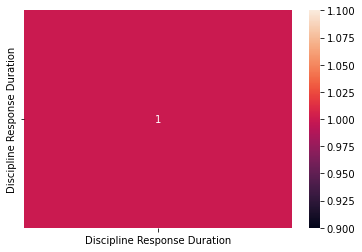

In [589]:
sns.heatmap(dflist[1].corr(),annot=True)

# No visible strong corelations

In [590]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np

0.0
-0.00032591655905389594
-0.0007956643152087217
-0.0011765353564818781
-0.007015287865432374
-0.12150027062858104
0.0


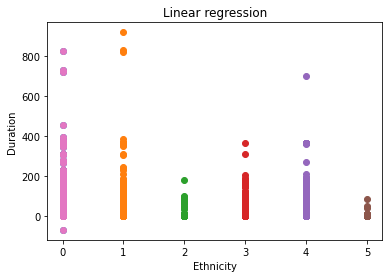

In [591]:
for i in range(7):
    X = dflist[i].iloc[:, 0:1].values
    y = dflist[i].iloc[:,3].values
    plt.scatter(X,y)
    plt.plot(X,lin_reg.predict(X))
    plt.title('Linear regression')
    plt.xlabel('Ethnicity')
    plt.ylabel('Duration')
    # we could also have just used the builtin function :) There are always many options
    r_squared = lin_reg.score(X, y)
    print(r_squared)
    
# 0 = Hispanic
# 1 = Caucasian
# 2 = Asian
# 3 = Black or African American
# 4 = American Indian/Alaskan Native
# 5 = Native Hawaiian or Other Pacific Islander
# 6 = Multiracial


Results show that caucasians have the longest duration punishments followed by hispanics

 rsquared values show little corelation

# Calculate ratio of repeat offending ethnicity

In [592]:
def getRatioRepeatOff(df):
    newdf2 = df.loc[df["Repeat Offender"]==1] 
    return len(df)/len(newdf2)
      
    

In [593]:
for i in range(7):
    print(ethnicity[i],' ratio is ',getRatioRepeatOff(dflist[i]))

Hispanic  ratio is  2.763667398966351
Caucasian  ratio is  2.968974650018918
Asian  ratio is  4.210045662100456
Black or African American  ratio is  2.2161425576519918
American Indian/Alaskan Native  ratio is  2.367291311754685
Native Hawaiian or Other Pacific Islander  ratio is  1.6693877551020408
Multiracial  ratio is  2.763667398966351


Results show that asian group is most likely to reoffend

# Train/test

In [704]:
%matplotlib inline
from sklearn.model_selection import train_test_split

dflist[0]

,Student Race Ethnicity Derived,Student Grade Level,Repeat Offender,Discipline Response Duration,Hate Crime,Serious Injury
0,0,8,0,2.0,0,0
4,0,8,1,1.0,0,0
7,0,6,0,3.0,0,0
16,0,8,0,0.0,0,0
17,0,8,0,1.0,0,0
...,...,...,...,...,...,...
284715,0,11,0,3.0,0,0
284716,0,11,0,3.0,0,0
284717,0,10,0,3.0,0,0
284718,0,12,0,3.0,0,0


In [758]:
# extract our labels and display
y = dflist[0]["Discipline Response Duration"]

# extract all the features and display
X = dflist[0].drop(["Discipline Response Duration"], axis = 1)

In [759]:
X


,Student Race Ethnicity Derived,Student Grade Level,Repeat Offender,Hate Crime,Serious Injury
0,0,8,0,0,0
4,0,8,1,0,0
7,0,6,0,0,0
16,0,8,0,0,0
17,0,8,0,0,0
...,...,...,...,...,...
284715,0,11,0,0,0
284716,0,11,0,0,0
284717,0,10,0,0,0
284718,0,12,0,0,0


In [760]:
Y=[]
for x in y:
  Y.append(int(x))
y=Y
y

[2,
 1,
 3,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 2,
 3,
 1,
 1,
 3,
 0,
 2,
 0,
 3,
 5,
 2,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 15,
 3,
 0,
 0,
 0,
 2,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 3,
 3,
 3,
 3,
 3,
 1,
 3,
 1,
 5,
 2,
 2,
 5,
 1,
 3,
 3,
 1,
 5,
 3,
 1,
 3,
 5,
 5,
 1,
 1,
 1,
 1,
 2,
 1,
 3,
 5,
 1,
 2,
 10,
 2,
 10,
 3,
 3,
 2,
 5,
 8,
 6,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 3,
 2,
 1,
 2,
 5,
 2,
 1,
 1,
 2,
 1,
 5,
 3,
 1,
 1,
 1,
 2,
 2,
 3,
 3,
 1,
 3,
 2,
 1,
 1,
 3,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 3,
 3,
 1,
 0,
 0,
 3,
 0,
 1,
 3,
 3,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 3,
 3,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 3,
 3,
 3,
 3,
 1,
 1,
 1,
 3,
 3,
 3,
 3,
 3,
 5,
 1,
 5,
 5,
 3,
 1,
 1,
 3,
 3,
 3,
 1,
 3,
 1,
 3,
 3,
 5,
 3,
 3,
 1,
 3,
 3,
 3,
 3,
 1,
 3,
 1,
 1,
 5,
 5,
 365,
 100,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 4,
 1,
 3,
 0,
 0,
 3,
 3,
 1,
 3,
 3,
 1,
 

In [761]:
# lets do 80/20
from sklearn.model_selection import train_test_split
# lets do 80/20
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=104,test_size=0.2,shuffle=True)


In [762]:
print("{0:0.2f}% in training set".format((len(X_train)/len(df.index)) * 100))
print("{0:0.2f}% in test set".format((len(X_test)/len(df.index)) * 100))

48.93% in training set
12.23% in test set


In [763]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB, GaussianNB



In [764]:
classifier_TT = MultinomialNB()

In [765]:
classifier_TT.fit(X_train, y_train)

MultinomialNB()

In [766]:
y_pred = classifier_TT.predict(X_test)

In [767]:
# calculate Accuracy - the percentage of labels that the model predicted correctly

from sklearn import metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, y_pred)))

Accuracy: 0.2679


In [768]:
from sklearn.metrics import confusion_matrix

In [769]:
# display the confusion matrix
#
# TP FP
# FN TN


confusion_matrix(y_test, y_pred)

array([[   0, 2205,    0, ...,    0,    0,    0],
       [   0, 3203,    0, ...,    0,    0,    0],
       [   0, 1898,    0, ...,    0,    0,    0],
       ...,
       [   0,    4,    0, ...,    0,    0,    0],
       [   0,    1,    0, ...,    0,    0,    0],
       [   0,    1,    0, ...,    0,    0,    0]], dtype=int64)

Prediction on test data:



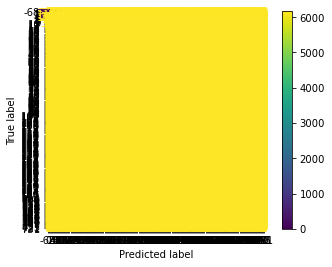

In [770]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred, labels=classifier_TT.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classifier_TT.classes_)
print('Prediction on test data:\n')
disp.plot()
plt.show()

In [742]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

# emphasize a high precision score if you care about false positives, i.e. accusing someone of stealing
# emphasize a high recall score if you care about false negatives. i.e. not detecting a disease

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      5020
           1       0.25      0.37      0.30      8643
           2       0.00      0.00      0.00      5063
           3       0.28      0.67      0.39      9146
           4       0.00      0.00      0.00       818
           5       0.00      0.00      0.00      3588
           6       0.00      0.00      0.00       235
           7       0.00      0.00      0.00       221
           8       0.00      0.00      0.00       164
           9       0.00      0.00      0.00       242
          10       0.00      0.00      0.00      1124
          11       0.00      0.00      0.00        33
          12       0.00      0.00      0.00        35
          13       0.00      0.00      0.00         7
          14       0.00      0.00      0.00        18
          15       0.00      0.00      0.00        20
          16       0.00      0.00      0.00        12
          17       0.00    

C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [799]:
def traintest(df):
    # extract our labels and display
    y = df["Discipline Response Duration"]

    # extract all the features and display
    X = df.drop(["Discipline Response Duration"], axis = 1)
    
    Y=[]
    for x in y:
      Y.append(int(x))
    y=Y

    # lets do 80/20
    X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=104,test_size=0.2,shuffle=True)
    
    print("{0:0.2f}% in training set".format((len(X_train)/len(df.index)) * 100))
    print("{0:0.2f}% in test set".format((len(X_test)/len(df.index)) * 100))
    
    classifier_TT = MultinomialNB()
    classifier_TT.fit(X_train, y_train)
    
    y_pred = classifier_TT.predict(X_test)
    
    print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, y_pred)))
    
    # display the confusion matrix
    #
    # TP FP
    # FN TN


    confusion_matrix(y_test, y_pred)
    
    cm = confusion_matrix(y_test, y_pred, labels=classifier_TT.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classifier_TT.classes_)
    print('Prediction on test data:\n')
    disp.plot()
    plt.show()

# Test on hispanic

80.00% in training set
20.00% in test set
Accuracy: 0.2679
Prediction on test data:



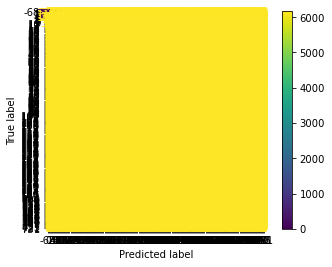

In [800]:
traintest(dflist[0])

# Test on dataset containing all ethnicities

In [790]:
df2

,Student Race Ethnicity Derived,Student Grade Level,Repeat Offender,Discipline Response Duration,Hate Crime,Serious Injury
0,0,8,0,2.0,0,0
1,1,8,0,2.0,0,0
2,2,8,0,1.0,0,0
3,1,8,1,1.0,0,0
4,0,8,1,1.0,0,0
...,...,...,...,...,...,...
285912,4,7,0,3.0,0,0
285913,4,7,0,5.0,0,0
285914,4,12,1,5.0,0,0
285915,4,9,0,3.0,0,0


In [791]:
racetonum(df2)
rptofftonum(df2)
hateCrime(df2)
cleanGradeLevel(df2)
serinjtonum(df2)

In [792]:
df2

,Student Race Ethnicity Derived,Student Grade Level,Repeat Offender,Discipline Response Duration,Hate Crime,Serious Injury
0,0,8,0,2.0,0,0
1,1,8,0,2.0,0,0
2,2,8,0,1.0,0,0
3,1,8,1,1.0,0,0
4,0,8,1,1.0,0,0
...,...,...,...,...,...,...
285912,4,7,0,3.0,0,0
285913,4,7,0,5.0,0,0
285914,4,12,1,5.0,0,0
285915,4,9,0,3.0,0,0


80.00% in training set
20.00% in test set
Accuracy: 0.2800
Prediction on test data:



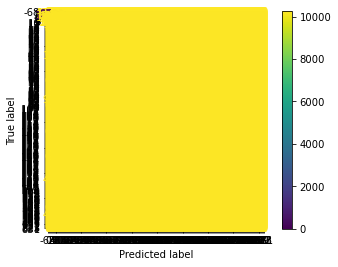

In [793]:
traintest(df2)

# Conclusion

I found no evidence from any of my tests that could support my hypothesis.

However, I did find that the Asian ethnic group has a nearly twofold higher reoffending rate than any other ethnicity.